In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


In [2]:
df = pd.read_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Final project /Time Series Data_Store/store_df.csv', index_col=0)
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,Year,Month,Prep_time,Cost,Profit%,order year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,261.9600,2,0.00,41.9136,2016,2016-11-01,3 days 00:00:00.000000000,220.0464,19.047619,2016
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,731.9400,3,0.00,219.5820,2016,2016-11-01,3 days 00:00:00.000000000,512.3580,42.857143,2016
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,14.6200,2,0.00,6.8714,2016,2016-06-01,4 days 00:00:00.000000000,7.7486,88.679245,2016
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,957.5775,5,0.45,-383.0310,2015,2015-10-01,7 days 00:00:00.000000000,1340.6085,-28.571429,2015
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,22.3680,2,0.20,2.5164,2015,2015-10-01,7 days 00:00:00.000000000,19.8516,12.676056,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,...,25.2480,3,0.20,4.1028,2014,2014-01-01,2 days 00:00:00.000000000,21.1452,19.402985,2014
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,91.9600,2,0.00,15.6332,2017,2017-02-01,5 days 00:00:00.000000000,76.3268,20.481928,2017
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,258.5760,2,0.20,19.3932,2017,2017-02-01,5 days 00:00:00.000000000,239.1828,8.108108,2017
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,29.6000,4,0.00,13.3200,2017,2017-02-01,5 days 00:00:00.000000000,16.2800,81.818182,2017


In [3]:
y = df['Profit%']
df = df.drop(['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Postal Code',
       'Customer Name', 'Profit', 'Profit%', 'Product Name', 'Product ID'],axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Year,Month,Prep_time,Cost,order year
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,2016,2016-11-01,3 days 00:00:00.000000000,220.0464,2016
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,2016,2016-11-01,3 days 00:00:00.000000000,512.3580,2016
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,2016,2016-06-01,4 days 00:00:00.000000000,7.7486,2016
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,2015,2015-10-01,7 days 00:00:00.000000000,1340.6085,2015
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2015,2015-10-01,7 days 00:00:00.000000000,19.8516,2015


# Pre_Processing

In [4]:
def extractMonth(row):
    return int(row.split('-')[1])

In [5]:
df['Month'] = df['Month'].apply(extractMonth)

In [6]:
df['Prep_time'] = df['Prep_time'].apply(lambda x: int(x.split()[0]))

In [7]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Year,Month,Prep_time,Cost,order year
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,2016,11,3,220.0464,2016
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,2016,11,3,512.3580,2016
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,2016,6,4,7.7486,2016
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,2015,10,7,1340.6085,2015
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2015,10,7,19.8516,2015


# Label encoding categorical values

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
df['City']= label_encoder.fit_transform(df['City'])

In [10]:
df['State']= label_encoder.fit_transform(df['State'])
df['Region']= label_encoder.fit_transform(df['Region'])

In [11]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Year,Month,Prep_time,Cost,order year
0,Second Class,Consumer,194,15,2,Furniture,Bookcases,261.9600,2,0.00,2016,11,3,220.0464,2016
1,Second Class,Consumer,194,15,2,Furniture,Chairs,731.9400,3,0.00,2016,11,3,512.3580,2016
2,Second Class,Corporate,266,3,3,Office Supplies,Labels,14.6200,2,0.00,2016,6,4,7.7486,2016
3,Standard Class,Consumer,153,8,2,Furniture,Tables,957.5775,5,0.45,2015,10,7,1340.6085,2015
4,Standard Class,Consumer,153,8,2,Office Supplies,Storage,22.3680,2,0.20,2015,10,7,19.8516,2015


# One-Hot Encoding

In [12]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
df_encoded = encoder.fit_transform(df)

In [13]:
df_encoded.head()

,Ship Mode_Second Class,Ship Mode_Standard Class,Ship Mode_First Class,Ship Mode_Same Day,Segment_Consumer,Segment_Corporate,Segment_Home Office,City,State,Region,...,Sub-Category_Machines,Sub-Category_Copiers,Sales,Quantity,Discount,Year,Month,Prep_time,Cost,order year
0,1,0,0,0,1,0,0,194,15,2,...,0,0,261.9600,2,0.00,2016,11,3,220.0464,2016
1,1,0,0,0,1,0,0,194,15,2,...,0,0,731.9400,3,0.00,2016,11,3,512.3580,2016
2,1,0,0,0,0,1,0,266,3,3,...,0,0,14.6200,2,0.00,2016,6,4,7.7486,2016
3,0,1,0,0,1,0,0,153,8,2,...,0,0,957.5775,5,0.45,2015,10,7,1340.6085,2015
4,0,1,0,0,1,0,0,153,8,2,...,0,0,22.3680,2,0.20,2015,10,7,19.8516,2015


In [14]:
df_encoded = df_encoded.drop('order year',axis=1)

In [15]:
df_encoded.head()

,Ship Mode_Second Class,Ship Mode_Standard Class,Ship Mode_First Class,Ship Mode_Same Day,Segment_Consumer,Segment_Corporate,Segment_Home Office,City,State,Region,...,Sub-Category_Supplies,Sub-Category_Machines,Sub-Category_Copiers,Sales,Quantity,Discount,Year,Month,Prep_time,Cost
0,1,0,0,0,1,0,0,194,15,2,...,0,0,0,261.9600,2,0.00,2016,11,3,220.0464
1,1,0,0,0,1,0,0,194,15,2,...,0,0,0,731.9400,3,0.00,2016,11,3,512.3580
2,1,0,0,0,0,1,0,266,3,3,...,0,0,0,14.6200,2,0.00,2016,6,4,7.7486
3,0,1,0,0,1,0,0,153,8,2,...,0,0,0,957.5775,5,0.45,2015,10,7,1340.6085
4,0,1,0,0,1,0,0,153,8,2,...,0,0,0,22.3680,2,0.20,2015,10,7,19.8516


# Splitting dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.25)

# Performing linear regression on model

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
accuracy = lr_model.score(X_test, y_test)
print('Model Accuracy:',accuracy)

Model Accuracy: 0.8767981084322825


In [19]:
y_pred = lr_model.predict(X_test)

# Visualizing the regression

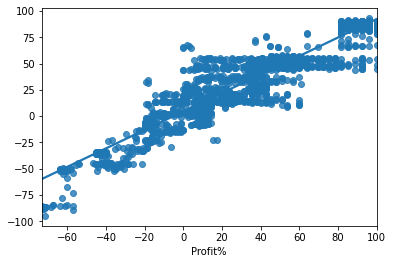

In [20]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, )

In [21]:
from sklearn import metrics
import math

print("Mean absolute error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error: 10.489652224873769
Root Mean Squared Error: 14.261248402179167


# Performing Random Forest Regression on data

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfc_model = RandomForestRegressor(n_estimators = 100)  
  
rfc_model.fit(X_train, y_train)

RandomForestRegressor()

# Calculating accuracy

In [23]:
print("Model Accuracy: ", rfc_model.score(X_test, y_test))

Model Accuracy:  0.9539857179702618


# Finding importance of features

In [24]:
feature_imp = pd.Series(rfc_model.feature_importances_, index = df_encoded.columns).sort_values(ascending = False)
feature_imp

Discount                    0.617102
Sub-Category_Paper          0.081910
Cost                        0.071576
Sub-Category_Binders        0.053596
Sales                       0.036692
Sub-Category_Labels         0.033338
Sub-Category_Envelopes      0.027131
Sub-Category_Storage        0.018708
City                        0.006157
Quantity                    0.005190
Sub-Category_Supplies       0.005172
Month                       0.004324
Sub-Category_Copiers        0.003899
Sub-Category_Fasteners      0.003043
State                       0.002953
Prep_time                   0.002921
Category_Office Supplies    0.002874
Sub-Category_Art            0.002759
Sub-Category_Machines       0.002646
Category_Furniture          0.002561
Sub-Category_Furnishings    0.002171
Year                        0.001939
Region                      0.001766
Sub-Category_Accessories    0.001437
Sub-Category_Appliances     0.001302
Segment_Corporate           0.000876
Sub-Category_Phones         0.000840
S

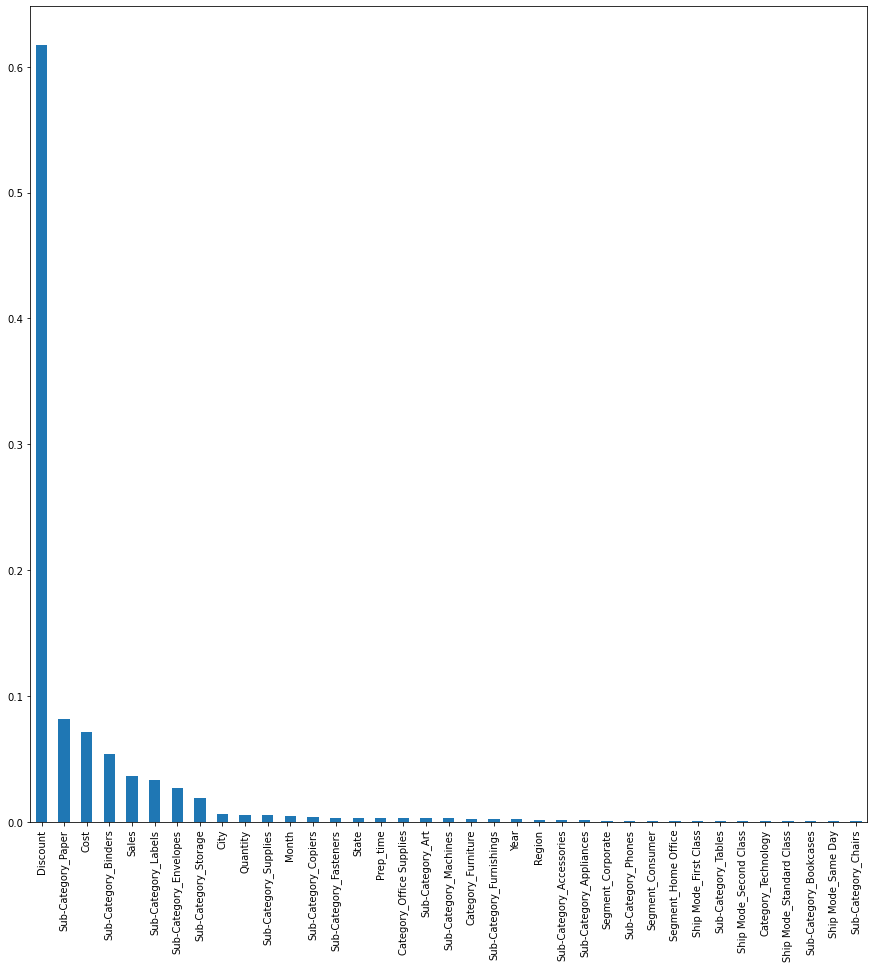

In [25]:
plot = feature_imp.plot.bar(figsize=(15, 15))

Here we can see that discount has the most affect on profit. This finding is unique, we might think that giving discount will reduce the profit but it actually increases it. The higher the cost, the profit can also be high. Papers Binders Labels give high impact on profit.Sales also affects profit